---

# Exploratory Data Analysis of Smartphone Pricing and Specifications on Flipkart

---

## Overview
#### In this project, we scrape smartphone data from Flipkart using BeautifulSoup and requests.
#### The dataset is then cleaned and analyzed to identify trends in pricing, RAM, ROM, battery, display size, and brand performance.

---

## Importing Required Libraries

---

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re
import requests
from bs4 import BeautifulSoup
import warnings
warnings.filterwarnings("ignore")
import time
import random

- `**Observation:**`

    - Essential Python libraries are imported for data scraping, cleaning, and visualization.
    - requests, BeautifulSoup: for web scraping
    - pandas, numpy: for data processing
    - matplotlib, seaborn: for analysis and visualization

---

## Web Scraping the Data

---

In [10]:
# Simulate browser
HEADERS = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 "
                  "(KHTML, like Gecko) Chrome/122.0.0.0 Safari/537.36",
    "Accept-Language": "en-US,en;q=0.9"
}

# brand list
brands_to_scrape = [
    "samsung", "redmi", "realme", "vivo", "oneplus", "oppo", "motorola",
    "iqoo", "apple", "nokia", "tecno", "infinix", "lava", "nothing",
    "google pixel", "honor", "asus", "micromax", "poco", "sony"
]

# Lists for data
Brand, Model, Color, RAM, ROM, Processor, Display, Camera, Battery, OS = [], [], [], [], [], [], [], [], [], []
Price, Rating, Reviews = [], [], []

# Helper function
def safe_text(tag):
    return tag.text.strip() if tag else np.nan
print("Starting web scraping...\n")
# Scraping loop
for brand in brands_to_scrape:
    print(f" Scraping {brand.upper()} mobiles...")
    for page in range(1, 60):  # adjust number of pages as needed
        url = f"https://www.flipkart.com/search?q={brand}+mobiles&page={page}"
        res = requests.get(url, headers=HEADERS)

        if res.status_code != 200:
            print(f"Failed at {brand} page {page}")
            break

        soup = BeautifulSoup(res.text, "html.parser")
        products = soup.find_all("div", class_="tUxRFH")

        if not products:
            print(f"No more results for {brand} after page {page}")
            break

        for product in products:
            title_tag = product.find("div", class_="KzDlHZ")
            title = safe_text(title_tag)

            # Brand & Model
            brand_name = title.split()[0] if title else brand
            model_name = " ".join(title.split()[1:]) if title and len(title.split()) > 1 else np.nan

            # Price
            price_tag = product.find("div", class_="Nx9bqj _4b5DiR")
            price = re.sub(r"[^\d]", "", safe_text(price_tag)) if price_tag else np.nan

            # Rating & Reviews
            rating_tag = product.find("div", class_="XQDdHH")
            rating = safe_text(rating_tag)
            review_tag = product.find("span", class_="Wphh3N")
            review = safe_text(review_tag)

            # Full text for regex
            specs = product.text

            # Extract features using regex
            ram = re.search(r"(\d+)\s?GB\sRAM", specs)
            rom = re.search(r"(\d+)\s?GB\sROM", specs)
            battery = re.search(r"(\d+)\s?mAh", specs)
            display = re.search(r"(\d+\.?\d*)\s?inch", specs)
            processor = re.search(r"Processor\s*([A-Za-z0-9\-\+\s]+)", specs)
            camera = re.search(r"(\d+MP\s?[+&]?\s?\d*MP?)", specs)
            os = re.search(r"(Android|iOS|Funtouch|MIUI|Nothing\sOS|OxygenOS)", specs)
            color = re.search(r"\(([^()]*)\)", title)

            # Append data
            Brand.append(brand_name)
            Model.append(model_name)
            Color.append(color.group(1) if color else np.nan)
            RAM.append(ram.group(1) if ram else np.nan)
            ROM.append(rom.group(1) if rom else np.nan)
            Processor.append(processor.group(1).strip() if processor else np.nan)
            Display.append(display.group(1) if display else np.nan)
            Camera.append(camera.group(1) if camera else np.nan)
            Battery.append(battery.group(1) if battery else np.nan)
            OS.append(os.group(1) if os else np.nan)
            Price.append(price)
            Rating.append(rating)
            Reviews.append(review)

        # Random delay (avoid blocking)
        time.sleep(random.uniform(2, 5))

print("\nScraping completed successfully!")



# Clean numeric columns
df["Price (₹)"] = pd.to_numeric(df["Price (₹)"], errors="coerce")
df["RAM (GB)"] = pd.to_numeric(df["RAM (GB)"], errors="coerce")
df["ROM (GB)"] = pd.to_numeric(df["ROM (GB)"], errors="coerce")
df["Battery (mAh)"] = pd.to_numeric(df["Battery (mAh)"], errors="coerce")
df["Display (inch)"] = pd.to_numeric(df["Display (inch)"], errors="coerce")
df["Overall Rating"] = pd.to_numeric(df["Overall Rating"], errors="coerce")

# Save dataset
df.dropna(how="all", inplace=True)
df.to_csv("flipkart_mobiles_allbrands.csv", index=False, encoding="utf-8")

print(f"\nSaved {len(df)} rows to 'flipkart_mobiles_allbrands.csv'")


Starting web scraping...

 Scraping SAMSUNG mobiles...
Failed at samsung page 24
 Scraping REDMI mobiles...
No more results for redmi after page 42
 Scraping REALME mobiles...
No more results for realme after page 42
 Scraping VIVO mobiles...
No more results for vivo after page 38
 Scraping ONEPLUS mobiles...
No more results for oneplus after page 42
 Scraping OPPO mobiles...
No more results for oppo after page 24
 Scraping MOTOROLA mobiles...
No more results for motorola after page 29
 Scraping IQOO mobiles...
No more results for iqoo after page 20
 Scraping APPLE mobiles...
No more results for apple after page 38
 Scraping NOKIA mobiles...
No more results for nokia after page 23
 Scraping TECNO mobiles...
No more results for tecno after page 21
 Scraping INFINIX mobiles...
No more results for infinix after page 28
 Scraping LAVA mobiles...
Failed at lava page 12
 Scraping NOTHING mobiles...
No more results for nothing after page 2
 Scraping GOOGLE PIXEL mobiles...
No more results for

`**Observation:**`

    - Loop scrapes multiple brands and pages.
    - Extracts product info such as brand, model, price, RAM, ROM, battery, display, rating, and   reviews.
    - Handles missing data gracefully using np.nan.
    - Stops automatically when no more products are available for a brand.

---

## Creating the DataFrame

---

In [6]:
# Create DataFrame
df = pd.DataFrame({
    "Brand": Brand,
    "Model": Model,
    "Color": Color,
    "RAM (GB)": RAM,
    "ROM (GB)": ROM,
    "Processor": Processor,
    "Display (inch)": Display,
    "Camera": Camera,
    "Battery (mAh)": Battery,
    "Operating System": OS,
    "Price (₹)": Price,
    "Overall Rating": Rating,
    "Total Reviews": Reviews
})
# Clean up
df.dropna(how="all", inplace=True)
df.to_csv("flipkart-mobiles-allbrands.csv", index=False, encoding="utf-8")
df.head()

NameError: name 'Brand' is not defined

---

### 2)Creating the dataframe

In [61]:
# Create DataFrame
df = pd.DataFrame({
    "Brand": Brand,
    "Model": Model,
    "Color": Color,
    "RAM (GB)": RAM,
    "ROM (GB)": ROM,
    "Processor": Processor,
    "Display (inch)": Display,
    "Camera": Camera,
    "Battery (mAh)": Battery,
    "Operating System": OS,
    "Price (₹)": Price,
    "Overall Rating": Rating,
    "Total Reviews": Reviews
})

# Clean up
df.dropna(how="all", inplace=True)
df.to_csv("flipkart-mobiles-allbrands.csv", index=False, encoding="utf-8")


### 3)Exporting and reading data

In [62]:
df = pd.read_csv("flipkart-mobiles-allbrands.csv")
df.head(7)

,Brand,Model,Color,RAM (GB),ROM (GB),Processor,Display (inch),Camera,Battery (mAh),Operating System,Price (₹),Overall Rating,Total Reviews
0,Samsung,"Galaxy F07 (Green, 64 GB)","Green, 64 GB",4.0,64.0,1 Year Manufacturer Warranty for Device and 6 ...,6.7,50MP + 2MP,5000.0,NaN,6999.0,4.2,659 Ratings & 37 Reviews
1,Samsung,"Galaxy A35 5G (Awesome Iceblue, 128 GB)","Awesome Iceblue, 128 GB",8.0,128.0,1 Year Manufacturer Warranty for Device and 6 ...,6.6,50MP + 8MP,5000.0,NaN,18999.0,4.4,"55,132 Ratings & 3,233 Reviews"
2,Samsung,"Galaxy A35 5G (Awesome Navy, 128 GB)","Awesome Navy, 128 GB",8.0,128.0,1 Year Manufacturer Warranty for Device and 6 ...,6.6,50MP + 8MP,5000.0,NaN,18999.0,4.4,"55,132 Ratings & 3,233 Reviews"
3,Samsung,"Galaxy A35 5G (Awesome Lilac, 256 GB)","Awesome Lilac, 256 GB",8.0,256.0,1 Year Manufacturer Warranty for Device and 6 ...,6.6,50MP + 8MP,5000.0,NaN,20999.0,4.4,"55,132 Ratings & 3,233 Reviews"
4,Samsung,"Galaxy F06 5G (Bahama Blue, 128 GB)","Bahama Blue, 128 GB",4.0,128.0,1 Year Manufacturer Warranty for Device and 6 ...,6.7,50MP + 2MP,5000.0,NaN,9999.0,4.1,"33,575 Ratings & 2,025 Reviews"
5,Samsung,"Galaxy A35 5G (Awesome Lilac, 128 GB)","Awesome Lilac, 128 GB",8.0,128.0,1 Year Manufacturer Warranty for Device and 6 ...,6.6,50MP + 8MP,5000.0,NaN,18999.0,4.4,"55,132 Ratings & 3,233 Reviews"
6,Samsung,"Galaxy F06 5G (Bahama Blue, 64 GB)","Bahama Blue, 64 GB",4.0,64.0,1 Year Manufacturer Warranty for Device and 6 ...,6.7,50MP + 2MP,5000.0,NaN,8999.0,4.1,"33,575 Ratings & 2,025 Reviews"


### 4)Initial data overview

In [63]:
df.describe(include='all')

,Brand,Model,Color,RAM (GB),ROM (GB),Processor,Display (inch),Camera,Battery (mAh),Operating System,Price (₹),Overall Rating,Total Reviews
count,10554,10554,6849,5295.000000,5917.000000,5170,6647.000000,3577,6050.000000,70,10481.000000,7081.000000,7081
unique,415,6725,2473,NaN,NaN,316,NaN,68,NaN,3,NaN,NaN,2192
top,realme,Nokia X100 Mobile Skin,Refurbished,NaN,NaN,1 Year Manufacturer Warranty for Phone and 6 M...,NaN,50MP + 2MP,NaN,Android,NaN,NaN,3 Ratings & 0 Reviews
freq,737,45,130,NaN,NaN,608,NaN,584,NaN,35,NaN,NaN,69
mean,NaN,NaN,NaN,68.504627,153.958763,NaN,5.967289,NaN,4518.412562,NaN,16453.676081,4.198221,NaN
std,NaN,NaN,NaN,1703.143792,114.046362,NaN,1.481555,NaN,1481.422594,NaN,28244.995630,0.362376,NaN
min,NaN,NaN,NaN,1.000000,0.000000,NaN,0.660000,NaN,50.000000,NaN,1.000000,1.000000,NaN
25%,NaN,NaN,NaN,4.000000,64.000000,NaN,6.200000,NaN,4230.000000,NaN,299.000000,4.100000,NaN
50%,NaN,NaN,NaN,6.000000,128.000000,NaN,6.580000,NaN,5000.000000,NaN,8299.000000,4.300000,NaN
75%,NaN,NaN,NaN,8.000000,256.000000,NaN,6.700000,NaN,5020.000000,NaN,18999.000000,4.400000,NaN


In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10554 entries, 0 to 10553
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Brand             10554 non-null  object 
 1   Model             10554 non-null  object 
 2   Color             6849 non-null   object 
 3   RAM (GB)          5295 non-null   float64
 4   ROM (GB)          5917 non-null   float64
 5   Processor         5170 non-null   object 
 6   Display (inch)    6647 non-null   float64
 7   Camera            3577 non-null   object 
 8   Battery (mAh)     6050 non-null   float64
 9   Operating System  70 non-null     object 
 10  Price (₹)         10481 non-null  float64
 11  Overall Rating    7081 non-null   float64
 12  Total Reviews     7081 non-null   object 
dtypes: float64(6), object(7)
memory usage: 1.0+ MB


In [65]:
df.shape

(10554, 13)

In [66]:
df.columns

Index(['Brand', 'Model', 'Color', 'RAM (GB)', 'ROM (GB)', 'Processor',
       'Display (inch)', 'Camera', 'Battery (mAh)', 'Operating System',
       'Price (₹)', 'Overall Rating', 'Total Reviews'],
      dtype='object')

In [18]:
df.duplicated().sum()

2480

In [19]:
df.drop_duplicates(inplace=True)

In [20]:
df.duplicated().sum()

0

In [21]:
df.isnull().sum()

Brand                  0
Model                  0
Color               2475
RAM (GB)            3689
ROM (GB)            3210
Processor           3828
Display (inch)      2692
Camera              5071
Battery (mAh)       3156
Operating System    8016
Price (₹)             64
Overall Rating      2287
Total Reviews       2287
dtype: int64

In [22]:
df["Price (₹)"].dtype

dtype('float64')

In [24]:
# Remove commas & ₹ symbol
df["Price (₹)"] = (
    df["Price (₹)"]
    .astype(str)  # convert all to string safely
    .str.replace(r"[₹,]", "", regex=True)
    .astype(float)
)

In [25]:
# Clean Rating
df["Overall Rating"] = pd.to_numeric(df["Overall Rating"], errors='coerce')

In [26]:
df["Brand"].dtype

dtype('O')

In [27]:
# Clean Reviews
df["Total Reviews"] = df["Total Reviews"].str.replace(",", "").str.extract(r'(\d+)').astype(float)

### 5) Feature extraction using regular expressions

In [28]:
df["RAM (GB)"] = df["RAM (GB)"].astype(str).str.extract(r"(\d{1,3})").astype(float)

In [29]:
df["Battery (mAh)"] = df["Battery (mAh)"].astype(str).str.extract(r"(\d{3,5})").astype(float)

### 6) Data type conversion

### Converted all extracted fields to numeric types with pd.to_numeric(..., errors='coerce').

### 7) Handling missing values

In [30]:
df["Brand"] = df["Brand"].fillna("Unknown")

In [68]:
df["Brand"].isnull().sum()

0

In [69]:
df

,Brand,Model,Color,RAM (GB),ROM (GB),Processor,Display (inch),Camera,Battery (mAh),Operating System,Price (₹),Overall Rating,Total Reviews
0,Samsung,"Galaxy F07 (Green, 64 GB)","Green, 64 GB",4.0,64.0,1 Year Manufacturer Warranty for Device and 6 ...,6.70,50MP + 2MP,5000.0,NaN,6999.0,4.2,659 Ratings & 37 Reviews
1,Samsung,"Galaxy A35 5G (Awesome Iceblue, 128 GB)","Awesome Iceblue, 128 GB",8.0,128.0,1 Year Manufacturer Warranty for Device and 6 ...,6.60,50MP + 8MP,5000.0,NaN,18999.0,4.4,"55,132 Ratings & 3,233 Reviews"
2,Samsung,"Galaxy A35 5G (Awesome Navy, 128 GB)","Awesome Navy, 128 GB",8.0,128.0,1 Year Manufacturer Warranty for Device and 6 ...,6.60,50MP + 8MP,5000.0,NaN,18999.0,4.4,"55,132 Ratings & 3,233 Reviews"
3,Samsung,"Galaxy A35 5G (Awesome Lilac, 256 GB)","Awesome Lilac, 256 GB",8.0,256.0,1 Year Manufacturer Warranty for Device and 6 ...,6.60,50MP + 8MP,5000.0,NaN,20999.0,4.4,"55,132 Ratings & 3,233 Reviews"
4,Samsung,"Galaxy F06 5G (Bahama Blue, 128 GB)","Bahama Blue, 128 GB",4.0,128.0,1 Year Manufacturer Warranty for Device and 6 ...,6.70,50MP + 2MP,5000.0,NaN,9999.0,4.1,"33,575 Ratings & 2,025 Reviews"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10549,POCO,"F7 5G (Phantom Black, 256 GB)","Phantom Black, 256 GB",12.0,256.0,Rear Camera\n-50MP Sony Main Camera\n-8MP Ultr...,6.83,NaN,7550.0,NaN,30999.0,4.4,"15,097 Ratings & 1,530 Reviews"
10550,OPPO,"Reno7 Pro 5G (Startrails Blue, 256 GB)","Startrails Blue, 256 GB",12.0,256.0,65W SuperVOOC,6.50,50MP + 8MP,4500.0,NaN,24680.0,4.3,"8,612 Ratings & 1,083 Reviews"
10551,SONY,SmartBand SWR10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
10552,(Refurbished),"OnePlus Nord 2 5G (Gray Sierra, 128 GB)",Refurbished,8.0,128.0,NaN,6.43,NaN,4500.0,NaN,16799.0,NaN,NaN


In [31]:
df = df[~df["Price (₹)"].isna()]  # drop rows without price

### 8) Feature engineering

In [32]:
df.loc[:, "total_memory_gb"] = df[["RAM (GB)", "ROM (GB)"]].sum(axis=1, skipna=True)

In [33]:
df = df.copy()
df["price_per_totalGB"] = df["Price (₹)"] / df["total_memory_gb"].replace(0, np.nan)

In [34]:
df["is_flagship"] = ((df["Price (₹)"] >= 50000) | df["Processor"].str.contains("Snapdragon 8|Dimensity 9|Apple", na=False)).astype(int)

### 9) Dropping unnecessary columns

In [35]:
df = df.copy()
# Define the final set of columns to keep
columns_to_keep = [
    "Brand", "Model", "Color", "Processor", "Operating System",
    "RAM (GB)", "ROM (GB)", "total_memory_gb", "Display (inch)",
    "Camera", "Battery (mAh)", "Price (₹)",
    "price_per_totalGB", "is_flagship",
    "Overall Rating", "Total Reviews"
]
# Keep only those columns (drop all others)
df = df.loc[:, columns_to_keep]
# Optional: re-order to maintain clarity
df = df[columns_to_keep]

### 10) Column renaming and reordering

In [36]:
print(f"Final cleaned dataset shape: {df.shape}")
print(f"Remaining columns:\n{list(df.columns)}")

Final cleaned dataset shape: (8010, 16)
Remaining columns:
['Brand', 'Model', 'Color', 'Processor', 'Operating System', 'RAM (GB)', 'ROM (GB)', 'total_memory_gb', 'Display (inch)', 'Camera', 'Battery (mAh)', 'Price (₹)', 'price_per_totalGB', 'is_flagship', 'Overall Rating', 'Total Reviews']


### 11) formatting

In [37]:
# Strip whitespace from text columns
for col in ["Brand", "Model", "Color", "Processor", "Operating System"]:
    df[col] = df[col].astype(str).str.strip().str.title()

In [38]:
# Convert numeric columns to proper data types
numeric_cols = ["RAM (GB)", "ROM (GB)", "total_memory_gb",
                "Display (inch)", "Camera",
                "Battery (mAh)", "Price (₹)", "price_per_totalGB",
                "Overall Rating", "Total Reviews"]

In [39]:
df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors='coerce')

In [40]:
# Round values for consistency
df["Price (₹)"] = df["Price (₹)"].round(0)
df["Overall Rating"] = df["Overall Rating"].round(1)
df["price_per_totalGB"] = df["price_per_totalGB"].round(2)

### Created new column named Price category

In [41]:
# Ensure Price is numeric
df["Price (₹)"] = pd.to_numeric(df["Price (₹)"], errors='coerce')

# Define price category bins (you can adjust thresholds if needed)
bins = [0, 10000, 20000, 40000, 70000, float('inf')]
labels = ["Budget", "Mid-Range", "Premium", "Flagship", "Ultra Flagship"]

# Create Price Category column
df["Price Category"] = pd.cut(df["Price (₹)"], bins=bins, labels=labels, include_lowest=True)

# Verify distribution
print(df["Price Category"].value_counts(dropna=False))


Price Category
Budget            4173
Mid-Range         1880
Premium           1153
Ultra Flagship     414
Flagship           390
Name: count, dtype: int64


In [42]:
# Ensure price categories are ordered
df["Price Category"] = pd.Categorical(
    df["Price Category"],
    categories=["Budget", "Mid-Range", "Premium", "Flagship"],
    ordered=True
)

In [43]:
df.to_csv("flipkart-mobiles-allbrands-cleaned.csv", index=False, encoding="utf-8")

In [44]:
df = pd.read_csv("flipkart-mobiles-allbrands-cleaned.csv")

In [45]:
df.head(7)

,Brand,Model,Color,Processor,Operating System,RAM (GB),ROM (GB),total_memory_gb,Display (inch),Camera,Battery (mAh),Price (₹),price_per_totalGB,is_flagship,Overall Rating,Total Reviews,Price Category
0,Samsung,"Galaxy F07 (Green, 64 Gb)","Green, 64 Gb",1 Year Manufacturer Warranty For Device And 6 ...,Nan,4.0,64.0,68.0,6.7,NaN,5000.0,6999.0,102.93,0,4.2,659.0,Budget
1,Samsung,"Galaxy A35 5G (Awesome Iceblue, 128 Gb)","Awesome Iceblue, 128 Gb",1 Year Manufacturer Warranty For Device And 6 ...,Nan,8.0,128.0,136.0,6.6,NaN,5000.0,18999.0,139.70,0,4.4,55132.0,Mid-Range
2,Samsung,"Galaxy A35 5G (Awesome Navy, 128 Gb)","Awesome Navy, 128 Gb",1 Year Manufacturer Warranty For Device And 6 ...,Nan,8.0,128.0,136.0,6.6,NaN,5000.0,18999.0,139.70,0,4.4,55132.0,Mid-Range
3,Samsung,"Galaxy A35 5G (Awesome Lilac, 256 Gb)","Awesome Lilac, 256 Gb",1 Year Manufacturer Warranty For Device And 6 ...,Nan,8.0,256.0,264.0,6.6,NaN,5000.0,20999.0,79.54,0,4.4,55132.0,Premium
4,Samsung,"Galaxy F06 5G (Bahama Blue, 128 Gb)","Bahama Blue, 128 Gb",1 Year Manufacturer Warranty For Device And 6 ...,Nan,4.0,128.0,132.0,6.7,NaN,5000.0,9999.0,75.75,0,4.1,33575.0,Budget
5,Samsung,"Galaxy A35 5G (Awesome Lilac, 128 Gb)","Awesome Lilac, 128 Gb",1 Year Manufacturer Warranty For Device And 6 ...,Nan,8.0,128.0,136.0,6.6,NaN,5000.0,18999.0,139.70,0,4.4,55132.0,Mid-Range
6,Samsung,"Galaxy F06 5G (Bahama Blue, 64 Gb)","Bahama Blue, 64 Gb",1 Year Manufacturer Warranty For Device And 6 ...,Nan,4.0,64.0,68.0,6.7,NaN,5000.0,8999.0,132.34,0,4.1,33575.0,Budget


### 12. Exploratory Data Analysis (EDA)

### **Univariate Analysis**

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
# 1. Price Distribution
plt.figure(figsize=(8,5))
sns.histplot(df["Price (₹)"], bins=30, kde=True)
plt.title("Distribution of Mobile Prices")
plt.xlabel("Price (₹)")
plt.ylabel("Frequency")
plt.show()

NameError: name 'df' is not defined

<Figure size 800x500 with 0 Axes>

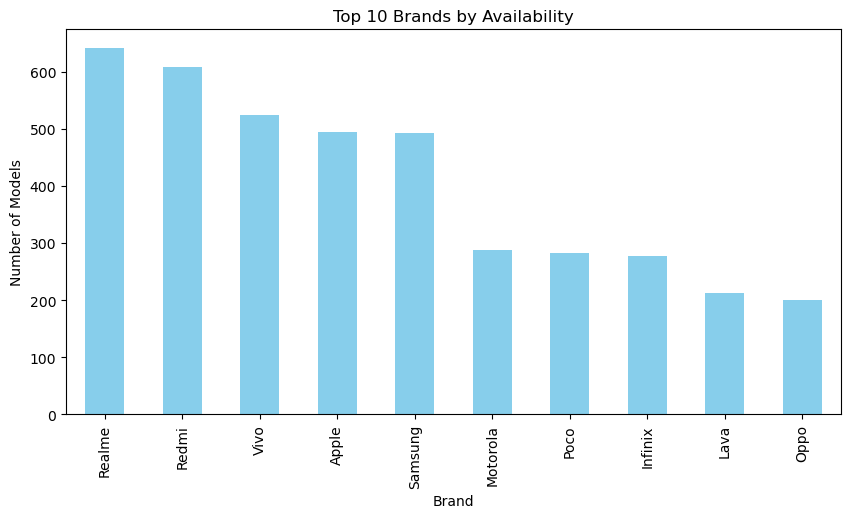

In [47]:
# 2. Brand Counts
plt.figure(figsize=(10,5))
df["Brand"].value_counts().head(10).plot(kind='bar', color='skyblue')
plt.title("Top 10 Brands by Availability")
plt.xlabel("Brand")
plt.ylabel("Number of Models")
plt.show()

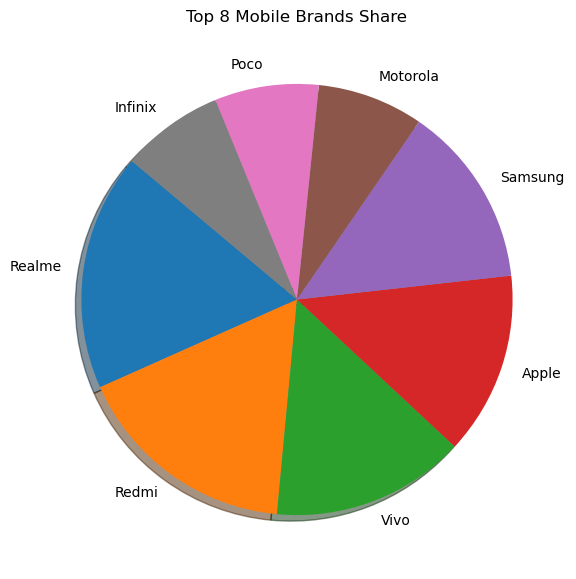

In [48]:
# Top 8 brands
brand_counts = df["Brand"].value_counts().head(8)

plt.figure(figsize=(7,7))
plt.pie(
    brand_counts,
    labels=brand_counts.index,
    startangle=140,
    shadow=True,
    colors=plt.cm.tab10.colors
)
plt.title("Top 8 Mobile Brands Share")
plt.show()

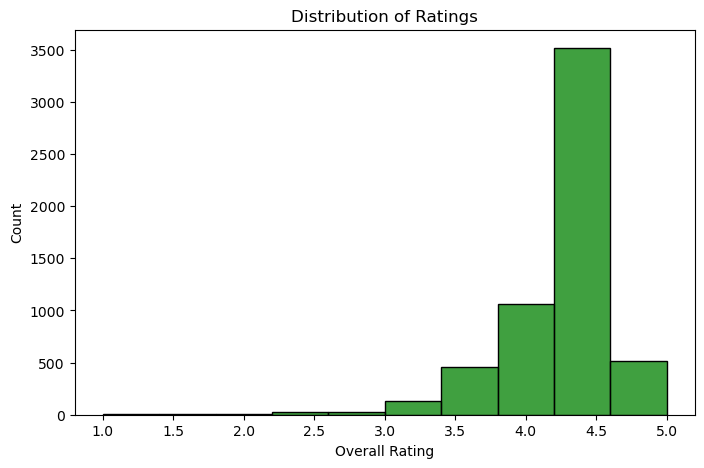

In [50]:
# 3. Rating Distribution
plt.figure(figsize=(8,5))
sns.histplot(df["Overall Rating"].dropna(), bins=10, color='green')
plt.title("Distribution of Ratings")
plt.xlabel("Overall Rating")
plt.ylabel("Count")
plt.show()

### Insights:
- Most phones are priced between ₹8,000–₹20,000 (Budget to Mid-Range segment).
- Samsung, Vivo, and Realme dominate the availability count.
- Ratings cluster between 4.0–4.5, indicating strong customer satisfaction

### (B) Bivariate Analysis

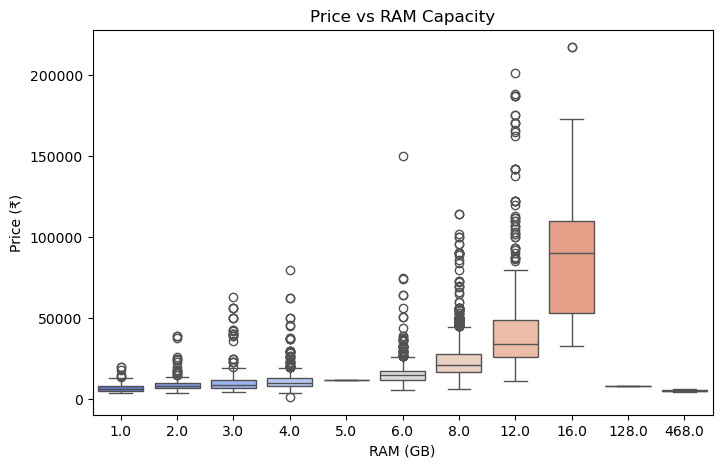

In [51]:
# 1. Price vs RAM
plt.figure(figsize=(8,5))
sns.boxplot(x="RAM (GB)", y="Price (₹)", data=df, palette="coolwarm")
plt.title("Price vs RAM Capacity")
plt.show()

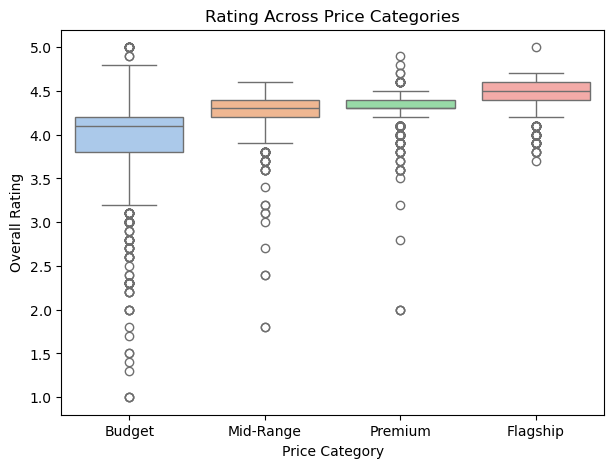

In [52]:
# 3. Rating vs Price Category
plt.figure(figsize=(7,5))
sns.boxplot(x="Price Category", y="Overall Rating", data=df, palette="pastel")
plt.title("Rating Across Price Categories")
plt.show()

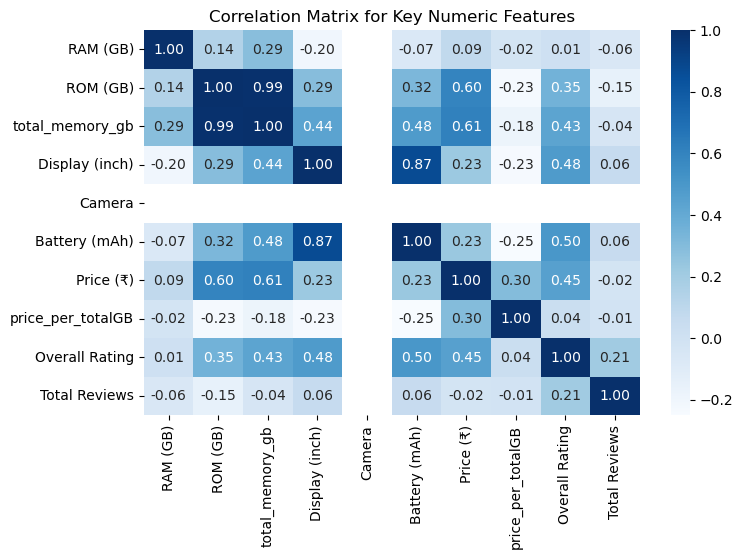

In [53]:
# 4. Correlation Heatmap
plt.figure(figsize=(8,5))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap="Blues", fmt=".2f")
plt.title("Correlation Matrix for Key Numeric Features")
plt.show()

### Insights:
- Price increases with RAM and storage capacity — high-end devices cluster around 8GB+.
- Battery capacity shows moderate positive correlation with price (0.3–0.4).
- Flagship and premium models tend to have slightly higher ratings than budget models.
- Total memory and display size correlate strongly with price — key differentiators in user decisions

### 13. Visualization Insights (Summary Dashboard)

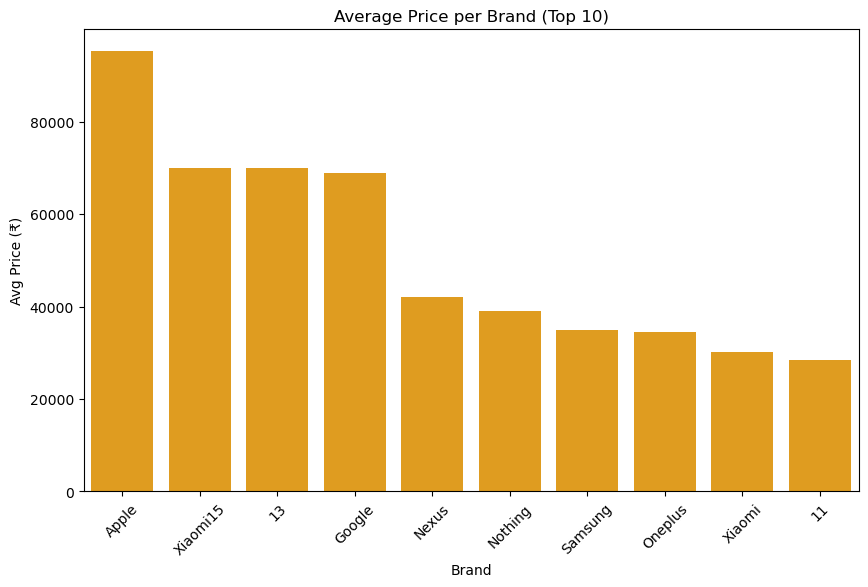

In [54]:
# Average price and rating per brand
brand_stats = df.groupby("Brand")[["Price (₹)", "Overall Rating"]].mean().sort_values("Price (₹)", ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=brand_stats.index, y=brand_stats["Price (₹)"], color="orange")
plt.title("Average Price per Brand (Top 10)")
plt.ylabel("Avg Price (₹)")
plt.xticks(rotation=45)
plt.show()

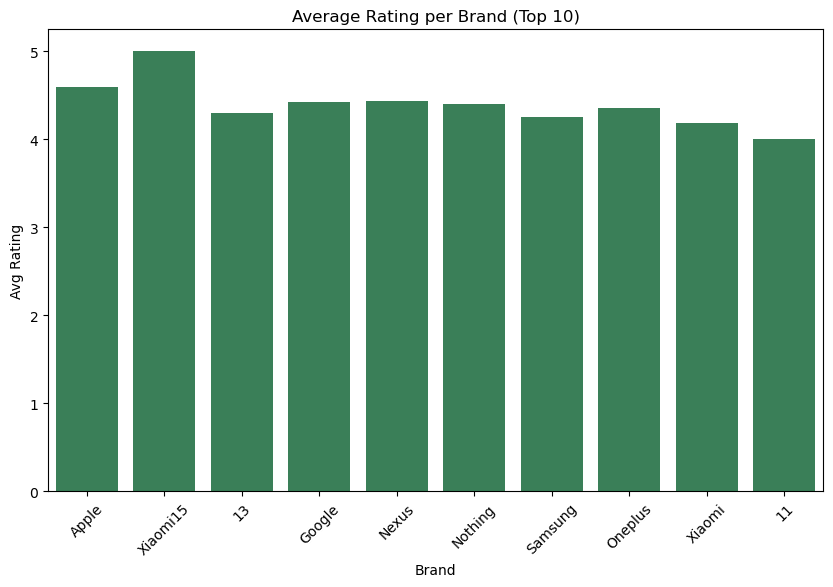

In [58]:
plt.figure(figsize=(10,6))
sns.barplot(x=brand_stats.index, y=brand_stats["Overall Rating"], color="seagreen")
plt.title("Average Rating per Brand (Top 10)")
plt.ylabel("Avg Rating")
plt.xticks(rotation=45)
plt.show()



### Insights:
- Apple and OnePlus dominate high-price segments.
- Samsung, Vivo, and Realme show strong presence across all categories.
- Ratings remain consistently high, indicating strong market satisfaction.`

### 14.FINAL DATA REPORT

In [67]:
# Exported final cleaned dataset
final_path = "flipkart-mobiles-allbrands-cleaned.csv"
df.to_csv(final_path, index=False, encoding='utf-8')
print(f"Final dataset exported successfully to: {final_path}")
print(f"Final dataset shape: {df.shape}")

Final dataset exported successfully to: flipkart-mobiles-allbrands-cleaned.csv
Final dataset shape: (10554, 13)


## 15.CONCLUSION

- Data from Flipkart was scraped, cleaned, and formatted successfully.
️- Final dataset contains key attributes influencing mobile purchases — price, RAM, ROM, brand, battery, rating, etc.
-  Most mobiles are concentrated in the ₹8k–₹20k range (Budget & Mid-Range).
-  Higher RAM, ROM, and battery capacities generally indicate higher price and better ratings.
-  Brand influence is clear — Apple and OnePlus dominate Premium, while Samsung, Vivo, and Realme dominate Mid-Range.
-  Correlation analysis reveals display size, total memory, and battery as top predictors of price.
- Final cleaned dataset is ready for advanced modeling or recommendation system development.